# Perceptron for document classification : sklearn's and ours

In this lab, we first see how to use scikit-learn to learn a linear classifier and test its performance.
The code is using a non-textual dataset that is already stored in the sklearn package.

Your job will be to do the same, but for a document classification task, using an external dataset (the medium dataset extracted from reuters, as in lab2).

Then you will implement the perceptron learning algorithm.

To turn in by **October 31st**, by sending me (marie.candito@gmail.com) the link to your colab copy, with your name added to the name of the colab, with subject : **ML1 LAB5**

In [69]:
import sklearn

## First experiments with a non-textual dataset, stored in sklearn : Iris

We will first use a non-textual dataset, the Iris dataset : it consists of
- irises classified into 3 different types of (Setosa, Versicolour, and Virginica)
- each iris is represented using 4 features : Sepal Length, Sepal Width, Petal Length and Petal Width

The dataset is stored into sklearn, for pedagogical uses:

NB: there are plenty of examples of sklearn code.
See for instance : https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

You can download the notebooks at the bottom of each example page.



In [70]:
from sklearn import datasets
iris = datasets.load_iris()

# the vectors representing the 150 instances of irises are in iris.data
print(iris.data.shape)
# the gold classes are in iris.target
print(iris.target)
print(iris.target_names)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


### Plotting the dataset

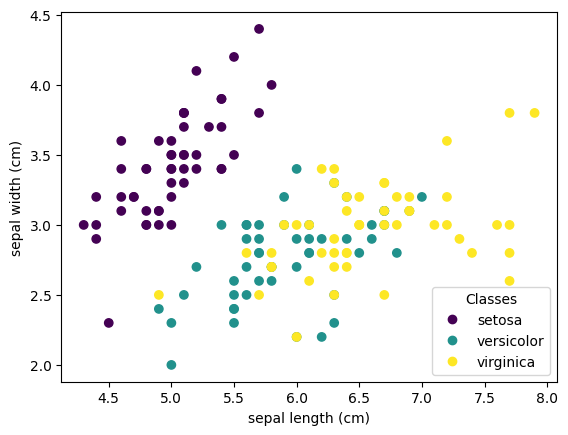

In [71]:
# taken from https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
import matplotlib.pyplot as plt

_, ax = plt.subplots()
# here only the two first features of the dataset are used
# (two first columns)
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


### Random split of the dataset into train and test

In [72]:
from sklearn.model_selection import train_test_split
#NB: providing a random_state ensures the split will always be the same
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Learning a linear classifier

All the types of classifiers in sklearn have a **`fit`** and a **`predict`** method.

In [73]:
from sklearn.linear_model import Perceptron
import sklearn

myclassifier = Perceptron()

print("SETTINGS:")
for a in sorted(myclassifier.__dict__.keys()):
    print("%s\t%s" % (a, str(myclassifier.__dict__[a])))

myclassifier.fit(X_train, y_train)


# --------- prediction on the test set---------------
y_test_pred = myclassifier.predict(X_test)
print("ACCURACY OF PERCEPTRON ON TEST: ", sklearn.metrics.accuracy_score(y_test, y_test_pred))


# --------- prediction on the train set--------------
y_train_pred = myclassifier.predict(X_train)
print("ACCURACY OF PERCEPTRON ON TRAIN FILE: ", sklearn.metrics.accuracy_score(y_train, y_train_pred))


SETTINGS:
C	1.0
alpha	0.0001
average	False
class_weight	None
early_stopping	False
epsilon	0.1
eta0	1.0
fit_intercept	True
l1_ratio	0.15
learning_rate	constant
loss	perceptron
max_iter	1000
n_iter_no_change	5
n_jobs	None
penalty	None
power_t	0.5
random_state	0
shuffle	True
tol	0.001
validation_fraction	0.1
verbose	0
warm_start	False
ACCURACY OF PERCEPTRON ON TEST:  0.8
ACCURACY OF PERCEPTRON ON TRAIN FILE:  0.7166666666666667


## Now for textual data

# Apply the previous learning/predicting phases to textual data (the medium dataset from reuters).

The train and dev files show one document per line.
First column is the gold class, second colum (tab separated) is the full text of the document.

Note that some of the documents are associated to several gold classes (comma-separated).

Yet in this lab, we stick to monolabel classification, hence you will artificially create mono-label annotated documents: ** if one doc has n gold classes, you will duplicate it into n (doc, single gold class) examples when loading the data**.

**TODO**:
- load the data
- use CountVectorizer to get BOW vectors for train / dev data
- use a sklearn Perceptron instance to learn and test a linear classifier (as shown above on the iris dataset)

- test whether using TfidfVectorizer is beneficial or not



### DONE: Fetching the data

In [74]:
import os
if not os.path.exists('./medium.onedocperline.utf8/'):
  # shell commands can be run using !
  import wget

  # The URL for the dataset zip file.
  url = 'http://www.linguist.univ-paris-diderot.fr/~mcandito/divers/medium.onedocperline.utf8.tgz'


  if not os.path.exists('./medium.onedocperline.utf8.tgz'):
    print('Downloading dataset')
    wget.download(url, './medium.onedocperline.utf8.tgz')
    !tar zxf medium.onedocperline.utf8.tgz

train_file = './medium.onedocperline.utf8/medium.train.onedocperline.utf8'
dev_file = './medium.onedocperline.utf8/medium.dev.onedocperline.utf8'

In [75]:
## display the first lines of the data dev file
!head ./medium.onedocperline.utf8/medium.dev.onedocperline.utf8

money-fx	INDUSTRIAL NATIONS RECONVENE FOR TALKS .  Financial ministers and central bankers of leading industrial nations reconvened here this afternoon.     Canadian Finance Minister Michael Wilson said on entering the meeting the ministers would review the Paris agreement. Asked if he was satisfied with West German and Japanese stimulus, Wilson replied, "They could do a little more."     French Finance Minister Edouard Balladur, meanwhile, confirmed there would be a communique at the end of the meeting.     Finance ministers and central bankers of Britain, FRance, Canada and West Germany were seen by Reuter correspondents returning to a Treasury building.     Japanese officials and Bundesbank President Karl Otto Poehl did not appear to have left the building at the end of earlier Group of Five talks which broke up around 2 p.m. local time (1800 gmt).     There was no sign, however, of the Italian delegation whose position was thrown into question this morning by the resignation of the

### DONE: Loading the data

In [76]:
## loading the data
def read_examples(infile):
    """
    Reads a file in onedocperline format, transforms it into
    (list of documents, list of gold classes)
    one doc = a string
    one class label = a string
    Input data can be multilabel, but are artificially transformed into mono-label data:
    if one doc has n gold classes, it is duplicated into n (doc, single gold class) pairs

    Returns:
    - a list of document strings
    - the corresponding list of gold class labels
    """
    docs = []
    classes = []
    instream = open(infile)
    for line in instream.readlines():
        (class_list, doc) = line.split("\t", 1) # the doc are separated by \t
        classes_of_this_doc = class_list.split(",") # the classes are separated by ,
        classes += classes_of_this_doc # get a list of all classes
        # document duplucation
        for x in range(len(classes_of_this_doc)):
            docs.append(doc)
    return docs, classes

(docs_train, y_train_strs) = read_examples(train_file)
(docs_dev, y_dev_strs) = read_examples(dev_file)


### TODO1: Encoding the documents into BOW matrices

Use CountVectorizer to produce the indices, the X_train and X_dev matrices.


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer()
vec_docs_train = model.fit_transform(docs_train)
vec_dev_train = model.transform(docs_dev)

### TODO2: Learn and evaluate with Sklearn
Use sklearn's Perceptron to learn on the training set, and evaluate on the dev set.


In [78]:
model = Perceptron()
model.fit(vec_docs_train, y_train_strs)
y_dev_pred = model.predict(vec_dev_train)
print("ACCURACY OF PERCEPTRON ON DEV: ", sklearn.metrics.accuracy_score(y_dev_strs, y_dev_pred))

ACCURACY OF PERCEPTRON ON DEV:  0.5758754863813229


# Our own perceptron

In [79]:
# ----------------------------------------
# Turning class labels into indices
# i2c : list from indices to classes
# c2i : dictionary from classes to indices
i2c = list(set(y_train_strs + y_dev_strs))
c2i = dict( [(c,i) for (i,c) in enumerate(i2c)])

print(i2c)
print(c2i)
print("Total nb of unique classes:", len(i2c))
y_train = [ c2i[c] for c in y_train_strs ]
y_dev = [ c2i[c] for c in y_dev_strs ]

['rice', 'jet', 'propane', 'cotton', 'stg', 'barley', 'copra-cake', 'oilseed', 'lead', 'cornglutenfeed', 'earn', 'groundnut', 'sun-oil', 'nickel', 'fuel', 'rye', 'crude', 'ship', 'rubber', 'orange', 'rape-meal', 'potato', 'livestock', 'tea', 'sunseed', 'palladium', 'wheat', 'lin-oil', 'gold', 'soybean', 'palmkernel', 'carcass', 'oat', 'l-cattle', 'fishmeal', 'dfl', 'trade', 'rape-oil', 'wool', 'acq', 'palm-oil', 'corn', 'veg-oil', 'platinum', 'retail', 'sugar', 'gas', 'corn-oil', 'dmk', 'cocoa', 'money-supply', 'grain', 'sorghum', 'pet-chem', 'tapioca', 'yen', 'heat', 'jobs', 'cpi', 'soy-oil', 'rapeseed', 'reserves', 'lumber', 'red-bean', 'bop', 'can', 'saudriyal', 'hog', 'linseed', 'coffee', 'soy-meal', 'gnp', 'money-fx', 'dlr', 'plywood', 'ipi', 'alum', 'income', 'sun-meal', 'iron-steel', 'meal-feed', 'nat-gas', 'interest', 'wpi', 'lei', 'zinc', 'tin', 'strategic-metal', 'groundnut-oil', 'coconut-oil', 'silver', 'instal-debt', 'housing', 'citruspulp', 'copper']
{'rice': 0, 'jet': 1, 

## TODO3: fill in below to implement the Perceptron yourself

Tips:


*   to use np.matmul we cannot use sparse matrices. The X_train and X_dev obtained with eg CountVectorizer have to be converted to the ndarray type.
*   It is crucial to loop over the training examples in a different order at each epoch. You can define a random order at the beginning of each epoch:
      
     `order = list(range(self.X_train.shape[0]))`
      
     `shuffle(order)`

      And then loop over examples using the `for t in order:`


In [101]:
from random import shuffle
import numpy as np

class our_Perceptron:

  def __init__(self, i2c, c2i):

    # nb of unique classes
    self.nb_labels = len(i2c)

    # parameters : Weight matrix and bias vector
    # we don't know the shapes until we fit
    self.W = None
    self.b = None

  def predict(self, x):
    """
    - x is a vector representing an object to classify
    Run the classifier on x input
    and return the predicted class"""
    y_pred = np.matmul(self.W, x) + self.b # compute the scores
    return np.argmax(y_pred) # return the index (classe) of the highest value

  def evaluate(self, X, y):
    """
    - X is a matrix of input vectors
    - y is vector of gold labels
    Run the classifier on X inputs
    and evaluate the obtained accuracy
    """
    nb_errors = 0
    for i in range(len(X)):
      y_pred = self.predict(X[i])
      if y_pred != y[i]:
        nb_errors += 1
    return 1 - nb_errors/len(X)

  def fit(self, nb_epochs, X_train, y_train, X_dev=None, y_dev=None):
    # Convert sparse matrices to dense numpy arrays
    X_train = X_train.toarray()
    if X_dev is not None:
      X_dev = X_dev.toarray()
    self.d = X_train.shape[1] # size of vectors representing objects to classify
    
    # Initialize the weight matrix and bias vector
    self.W = np.zeros((self.nb_labels, self.d))
    self.b = np.zeros(self.nb_labels)
    self.X_train = X_train
    self.y_train = y_train

    # TODO
    # implement the perceptron learning algorithm

    # for each epoch, you will register
    # - the accuracy for the development and the training set
    # - the nb of updates done during the epoch
    dev_accuracies = []
    train_accuracies = []
    nb_updates_each_epoch = []


    # - initialize the parameters
    # - loop over nb_epochs
    # - in each epoch, loop over the X_train/y_train examples in random order
    for epoch in range(nb_epochs):
      nb_updates = 0
      # shuffle the training set
      indices = list(range(X_train.shape[0]))
      shuffle(indices)
      # for each example in the training set
      for i in indices:
        # get the input vector and the gold label
        x = X_train[i]
        y = y_train[i]
        # compute the prediction
        y_pred = self.predict(x)
        # if the prediction is wrong
        if y_pred != y:
          # update the parameters
          # W = W + y*x
          # b = b + y
          self.W[y] += x
          self.b[y] += 1
          self.W[y_pred] -= x
          self.b[y_pred] -= 1
          # register the update
          nb_updates += 1
      # after each epoch, compute and print the accuracy on the training set, and on the development set
      score_train = self.evaluate(X_train, y_train)
      score_dev = self.evaluate(X_dev, y_dev)
      print("Epoch %d, train accuracy %.3f, dev accuracy %.3f, nb of updates %d" % (epoch, score_train, score_dev, nb_updates))
      train_accuracies.append(score_train)
      dev_accuracies.append(score_dev)
      nb_updates_each_epoch.append(nb_updates)
    # after each epoch, compute and print the accuracy on the training set, and on the development set
    return dev_accuracies, train_accuracies, nb_updates_each_epoch



In [105]:
my_perceptron = our_Perceptron(i2c, c2i)

NB_EPOCHS = 30
X_dev = vec_dev_train
y_dev = y_dev
X_train = vec_docs_train
y_train = y_train
# uncomment to test your implementation
dev_accs, train_accs, nb_updates = my_perceptron.fit(NB_EPOCHS, X_train, y_train, X_dev, y_dev)

Epoch 0, train accuracy 0.635, dev accuracy 0.490, nb of updates 1234
Epoch 1, train accuracy 0.674, dev accuracy 0.518, nb of updates 899
Epoch 2, train accuracy 0.680, dev accuracy 0.494, nb of updates 840
Epoch 3, train accuracy 0.721, dev accuracy 0.553, nb of updates 777
Epoch 4, train accuracy 0.744, dev accuracy 0.584, nb of updates 718
Epoch 5, train accuracy 0.750, dev accuracy 0.584, nb of updates 739
Epoch 6, train accuracy 0.756, dev accuracy 0.584, nb of updates 721
Epoch 7, train accuracy 0.752, dev accuracy 0.572, nb of updates 722
Epoch 8, train accuracy 0.750, dev accuracy 0.564, nb of updates 717
Epoch 9, train accuracy 0.746, dev accuracy 0.568, nb of updates 690
Epoch 10, train accuracy 0.738, dev accuracy 0.572, nb of updates 686
Epoch 11, train accuracy 0.774, dev accuracy 0.611, nb of updates 672
Epoch 12, train accuracy 0.772, dev accuracy 0.619, nb of updates 689
Epoch 13, train accuracy 0.757, dev accuracy 0.518, nb of updates 676
Epoch 14, train accuracy 0.78